In [ ]:
from google.colab import files # Загрузка файлов
from tensorflow.keras.utils import to_categorical # Функция для представления в формате one_hot_encoding
import os # Работа с папками и файлами
import librosa # Параметризация аудио
import numpy as np
import time # модуль time для подсчёта времени
from google.colab import drive
import matplotlib.pyplot as plt

from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras import utils

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Параметры
voice_gleb = []
voice_alex = []
voice_sofa = []
voice_egor = []
voice_nikita = []

voice_gleb.append('/content/drive/MyDrive/result/my_speech.mp3')
voice_gleb.append('/content/drive/MyDrive/result/noise_rain_audio.mp3')
voice_gleb.append('/content/drive/MyDrive/result/noise_school_audio.mp3')
voice_gleb.append('/content/drive/MyDrive/result/noise_street_audio.mp3')

voice_alex.append('/content/drive/MyDrive/alex/alex_origin.wav')
voice_alex.append('/content/drive/MyDrive/alex/alex_rain.wav')
voice_alex.append('/content/drive/MyDrive/alex/alex_school.wav')
voice_alex.append('/content/drive/MyDrive/alex/alex_street.wav')

voice_egor.append('/content/drive/MyDrive/15min.wav')
voice_egor.append('/content/drive/MyDrive/ML/audio1.mp3')
voice_egor.append('/content/drive/MyDrive/ML/audio2.mp3')
voice_egor.append('/content/drive/MyDrive/ML/audio3.mp3')

voice_sofa.append('/content/drive/MyDrive/audio/sofia_voice.mp3')
voice_sofa.append('/content/drive/MyDrive/audio/sofia_rain.wav')
voice_sofa.append('/content/drive/MyDrive/audio/sofia_school.wav')
voice_sofa.append('/content/drive/MyDrive/audio/sofia_street.wav')

voice_nikita.append('/content/drive/MyDrive/nikita_audio/датасет.mp3')
voice_nikita.append('/content/drive/MyDrive/nikita_audio/датасетАвтомобиль.mp3')
voice_nikita.append('/content/drive/MyDrive/nikita_audio/датасетУлица.mp3')
voice_nikita.append('/content/drive/MyDrive/nikita_audio/датасетШкола.mp3')

dataset = []
dataset.append(voice_gleb)
dataset.append(voice_alex)
dataset.append(voice_egor)
dataset.append(voice_sofa)
dataset.append(voice_nikita)

class_num = len(dataset)

In [ ]:
# Функция получения параметров аудио-сигнала
def get_features(x, sr):
  chroma_stft = librosa.feature.chroma_stft(x, sr=sr) # Частота цветности
  mfcc = librosa.feature.mfcc(x, sr=sr) # Мел-кепстральные коэффициенты
  
  rmse = np.mean(librosa.feature.rms(x)) # Среднеквадратичная амплитуда
  spec_cent = np.mean(librosa.feature.spectral_centroid(x, sr=sr)) # Среднее спектральныго центроида
  spec_bw = np.mean(librosa.feature.spectral_bandwidth(x, sr=sr)) # Среднее ширины полосы частот
  rolloff = np.mean(librosa.feature.spectral_rolloff(x, sr=sr)) # Среднее спектрального спада частоты
  zcr = np.mean(librosa.feature.zero_crossing_rate(x)) # Средняя частота пересечения нуля звукового временного ряда
  
  
  # Добавляем все параметры в один список
  out = [] # создаем пустой список
  out.append(rmse)      # добавляем среднеквадратичную амплитуду
  out.append(spec_cent) # добавляем спектральный центроид
  out.append(spec_bw)   # добавляем ширину полосы частот
  out.append(rolloff)   # добавляем спектральный спад частоты
  out.append(zcr)       # добавляем пересечение нуля
  
  # добавляем среднее всех Мел спектральных коэффициентов (20 значений)
  for e in mfcc:
    out.append(np.mean(e))

  # добавляем среднее всех частот цветности (12 значений)
  for e in chroma_stft:
    out.append(np.mean(e))
  
  # Возвращаем 37 значений
  return out

In [ ]:
# Удаляем директорию с промежуточными данными и создаем заново
xTrain = []
yTrain = []

import warnings
warnings.filterwarnings("ignore")

# Проходим по всем жарнам
for i, speaker in enumerate(dataset):
  # Запоминаем время старта формирования выборки
  start_time = time.time()
  
  # Берём название текущего жанра

  for voice in speaker:
    # Загружаем аудиосигнал

    for start in range(20, 840, 125):
      x, sr = librosa.load(voice, mono=True, offset=start, duration=20)
      # x - массив семплов
      # sr - частота дискретизации
      # offset - сдвиг относительно начала. Будем загружать, начиная с 20-й секунды
      # duration - продолжительность открывка. Мы будем загружать по 30 секунд от каждого аудио-файла

      # Параметризуем аудио-сигнал
      out = get_features(x, sr)
    
      xTrain.append(out)
      yTrain.append(to_categorical(i, class_num))

    # Выводим информацию о готовности обработки датасета
    print(i, voice, ":", round(time.time() - start_time), "c")


# Переводим данные в numpy массивы
xTrain = np.array(xTrain)
yTrain = np.array(yTrain)

0 /content/drive/MyDrive/result/my_speech.mp3 : 17 c
0 /content/drive/MyDrive/result/noise_rain_audio.mp3 : 33 c
0 /content/drive/MyDrive/result/noise_school_audio.mp3 : 48 c
0 /content/drive/MyDrive/result/noise_street_audio.mp3 : 64 c
1 /content/drive/MyDrive/alex/alex_origin.wav : 12 c
1 /content/drive/MyDrive/alex/alex_rain.wav : 25 c
1 /content/drive/MyDrive/alex/alex_school.wav : 38 c
1 /content/drive/MyDrive/alex/alex_street.wav : 45 c
2 /content/drive/MyDrive/15min.wav : 14 c
2 /content/drive/MyDrive/ML/audio1.mp3 : 35 c
2 /content/drive/MyDrive/ML/audio2.mp3 : 51 c
2 /content/drive/MyDrive/ML/audio3.mp3 : 73 c
3 /content/drive/MyDrive/audio/sofia_voice.mp3 : 22 c
3 /content/drive/MyDrive/audio/sofia_rain.wav : 35 c
3 /content/drive/MyDrive/audio/sofia_school.wav : 47 c
3 /content/drive/MyDrive/audio/sofia_street.wav : 53 c
4 /content/drive/MyDrive/nikita_audio/датасет.mp3 : 21 c
4 /content/drive/MyDrive/nikita_audio/датасетАвтомобиль.mp3 : 43 c
4 /content/drive/MyDrive/nikita_

In [ ]:
# Переводим данные в numpy массивы
xTrain = np.array(xTrain)
yTrain = np.array(yTrain)

In [ ]:
# Проверяем yTrain
y_train_class = np.argmax(yTrain, axis=1)
print(y_train_class)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


In [ ]:
xTrainS, xVal, yTrainS, yVal = train_test_split(xTrain, yTrain, test_size=0.1)

In [ ]:
# Выводим размерности обучающей выборки
print("xTrain:", xTrain.shape)
print("yTrain:", yTrain.shape)
# Выводим размерности проверочкой выборки
print("xTrain:", xVal.shape)
print("yTrain:", yVal.shape)

xTrain: (140, 37)
yTrain: (140, 5)
xTrain: (14, 37)
yTrain: (14, 5)


In [ ]:
# Выводим размерности обучающей и проверочной выборки
print(xTrainS.shape)
print(yTrainS.shape)
print(xVal.shape)
print(yVal.shape)

(126, 37)
(126, 5)
(14, 37)
(14, 5)


Количество аудио-параметров: 37
Количество жанров: 5
Epoch 1/200
7/7 [==============================] - 1s 28ms/step - loss: 195.8819 - accuracy: 0.1984 - val_loss: 131.0715 - val_accuracy: 0.2143
Epoch 2/200
7/7 [==============================] - 0s 4ms/step - loss: 173.2709 - accuracy: 0.1984 - val_loss: 116.7622 - val_accuracy: 0.2143
Epoch 3/200
7/7 [==============================] - 0s 5ms/step - loss: 159.7737 - accuracy: 0.2460 - val_loss: 106.4819 - val_accuracy: 0.2857
Epoch 4/200
7/7 [==============================] - 0s 5ms/step - loss: 148.8439 - accuracy: 0.2778 - val_loss: 98.5393 - val_accuracy: 0.4286
Epoch 5/200
7/7 [==============================] - 0s 4ms/step - loss: 139.3247 - accuracy: 0.2937 - val_loss: 91.4684 - val_accuracy: 0.4286
Epoch 6/200
7/7 [==============================] - 0s 6ms/step - loss: 130.2266 - accuracy: 0.2937 - val_loss: 85.0195 - val_accuracy: 0.3571
Epoch 7/200
7/7 [==============================] - 0s 5ms/step - loss: 122.9268 - accuracy:

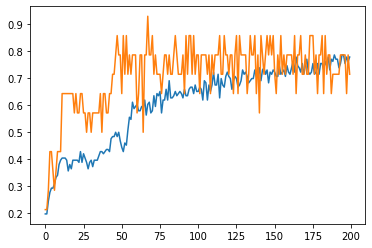

In [ ]:
# Сохраним количество параметров, полученных при анализе аудио-сигнала
param_num = xTrain.shape[1]
print("Количество аудио-параметров:", param_num)
print("Количество жанров:", class_num)

model = Sequential()
model.add(Dense(256, activation='elu', input_shape=(param_num,)))
model.add(Dense(128, activation='elu'))
model.add(Dense(64, activation='elu'))
model.add(Dense(32, activation='elu'))
model.add(Dense(class_num, activation='softmax'))

# Компилируем сеть
model.compile(optimizer=RMSprop(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Обучаем
history = model.fit(xTrainS, yTrainS,
                    epochs=200,
                    batch_size=20,
                    validation_data=(xVal, yVal))

#Выводим график точности распознавания на обучающей и проверочной выборках
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

Распознование голоса

In [ ]:
# Выбираем песню для распознавания
test_voice = '/content/drive/MyDrive/result/test_sample_gleb_speech.wav'

speakers = ['Глеб', 'Саша', 'Егор', 'София', 'Никита']

# Загружаем файл для параметризации
y, sr = librosa.load(test_voice, mono=True, duration=30)

# Параметризуем сигнал
out = get_features(y, sr)

# Добавлям размерность, т.к. на вход нейронки подается массив из параметров n-числа композиций. В нашем случае - n = 1
out = np.array(out).reshape(1, len(out))
#out = [out]

# Делаем predict
prediction = model.predict(out)

predict_class = np.argmax(prediction[0])

# Вывод нейронки
print("Выход сети:")
print(prediction[0])
print()
for i in range(5):
  print(i,"->","{:.40f}".format(prediction[0][i]))
print()

print("Номер распознанного человека: ", predict_class)
print("Распознанный человек: ", speakers[predict_class])


1/1 [==============================] - 0s 18ms/step
Выход сети:
[3.1942585e-01 1.8048843e-02 5.0650590e-07 8.1198113e-03 6.5440500e-01]

0 -> 0.3194258511066436767578125000000000000000
1 -> 0.0180488433688879013061523437500000000000
2 -> 0.0000005065058985564974136650562286376953
3 -> 0.0081198113039135932922363281250000000000
4 -> 0.6544049978256225585937500000000000000000

Номер распознанного человека:  4
Распознанный человек:  Никита
